In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Pea Flowers

In [6]:
null = make_array('Purple', 'Purple', 'Purple', 'White')
null

array(['Purple', 'Purple', 'Purple', 'White'], 
      dtype='<U6')

In [10]:
sample = np.random.choice(null, 10)
sample

array(['Purple', 'White', 'White', 'Purple', 'White', 'Purple', 'Purple',
       'White', 'Purple', 'Purple'], 
      dtype='<U6')

In [12]:
proportion_purple = np.count_nonzero(sample == 'Purple') / len(sample)
proportion_purple

0.6

Test statistic: sample proportion of purple flowers minus expected (0.75):

In [13]:
abs(proportion_purple - 0.75)

0.15000000000000002

In [14]:
def test_stat(sample):
    proportion_purple = np.count_nonzero(sample == 'Purple') / len(sample)
    return abs(proportion_purple - 0.75)

total_plants = 929
observed_statistic = 0.0088805166846070982 # 705 / 929 were purple

In [15]:
# Simulating the test statistic under the null hypothesis
repetitions = 5000
sampled_stats = make_array()

for i in np.arange(repetitions):
    new_sample = np.random.choice(null, total_plants)
    sampled_stats = np.append(sampled_stats, test_stat(new_sample))

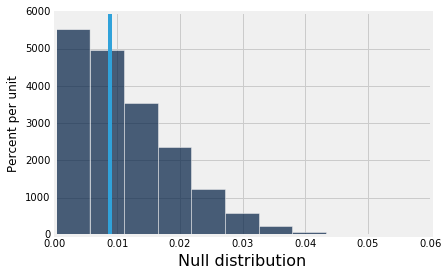

In [4]:
null_dist = Table().with_column('Null distribution', sampled_stats)
null_dist.hist()
_ = plt.plot([observed_statistic, observed_statistic], [0, 60])

## P-value

In [16]:
# The P-value (an approximation based on the simulation)
np.count_nonzero(sampled_stats >= observed_statistic)/repetitions

0.546

## Error Probability

In [19]:
sam_tried_again = 0.03
sam_tried_again

0.03

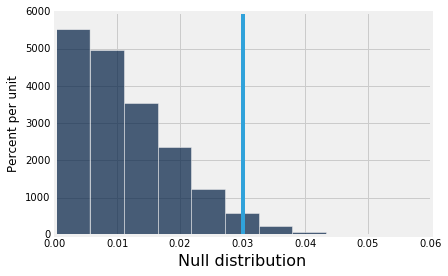

In [20]:
null_dist.hist()
_ = plt.plot([sam_tried_again, sam_tried_again], [0, 60])

In [21]:
# The P-value (an approximation based on the simulation)
np.count_nonzero(sampled_stats >= sam_tried_again)/repetitions

0.0374

## Discussion Question: What Happens If...

I remove the absolute value from the test statistic?

In [49]:
def test_stat(sample):
    prop_purple = (np.count_nonzero(sample == 'Purple')
                   / len(sample)
                   - 0.75)
    return prop_purple

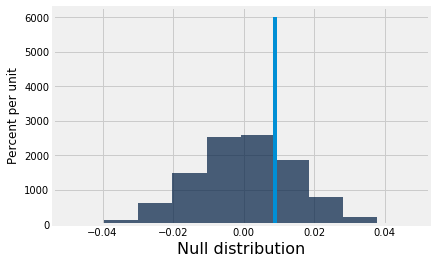

In [52]:
repetitions = 5000
sample_stats = make_array()

for i in np.arange(repetitions):
    stat = test_stat(np.random.choice(null, total_plants))
    sample_stats = np.append(sample_stats, stat)
    
null_dist = Table().with_columns('Null distribution', sample_stats)
null_dist.hist()
_ = plt.plot([observed_statistic, observed_statistic], [0, 60])

In [53]:
# compute the p-value
np.count_nonzero(sample_stats >= observed_statistic) / len(sample_stats)

# the previous p-value was around 0.54. Why is it different this time?

0.283